In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('weather_classification_data.csv')


In [ ]:
print("Размер датасета:", df.shape)
print(f'''Уникальные значения целевой переменной (последний столбец):
{df.iloc[:, -1].unique()}
Число уникальных классов:{len(df.iloc[:, -1].unique())}''')


Размер датасета: (13200, 11)
Уникальные значения целевой переменной (последний столбец):
['Rainy' 'Cloudy' 'Sunny' 'Snowy']
Число уникальных классов:4


In [ ]:
inicial_len = len(df)
print(f'''=== Удаление дубликатов ===
Исходное количество строк: [{inicial_len}]''')
# Удаляем полностью дублирующиеся строки
df = df.drop_duplicates()
print(f"Количество строк после удаления дубликатов: {len(df)}")
print(f"Удалено {inicial_len - len(df.drop_duplicates())} дублирующихся строки.")

=== Удаление дубликатов ===
Исходное количество строк: [13200]
Количество строк после удаления дубликатов: 13200
Удалено 0 дублирующихся строки.


In [ ]:
print("\nПропуски по колонкам (sum):")
print(df.isnull().sum())


Пропуски по колонкам (sum):
Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


In [ ]:
print("\nРаспределение целевой переменной 'weather type':")
print(df['Weather Type'].value_counts().sort_index())


Распределение целевой переменной 'weather type':
Weather Type
Cloudy    3300
Rainy     3300
Snowy     3300
Sunny     3300
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_encoders = {}
for col in df.select_dtypes(include=('object')):
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

print("\nТипы данных после кодирования:")
print(df_encoded.dtypes)
print("\nПервые 5 строк закодированного датасета:")
display(df_encoded.head())


Типы данных после кодирования:
Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover               int64
Atmospheric Pressure    float64
UV Index                  int64
Season                    int64
Visibility (km)         float64
Location                  int64
Weather Type              int64
dtype: object

Первые 5 строк закодированного датасета:


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1


In [ ]:
print("\nИнформация о датафрейме (df.info()):")
df_encoded.info()


Информация о датафрейме (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  int64  
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  int64  
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  int64  
 10  Weather Type          13200 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.1 MB


In [ ]:
from sklearn.preprocessing import StandardScaler # скейл

numeric_cols = df_encoded.select_dtypes(include=('float64')).columns.tolist() + ['Humidity']
print("Числовые признаки для масштабирования:", *numeric_cols)
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])
print("Числовые признаки после масштабирования (первые 5 строк):")
display(df_encoded[numeric_cols].head())

Числовые признаки для масштабирования: Temperature Wind Speed Precipitation (%) Atmospheric Pressure Visibility (km) Humidity
Числовые признаки после масштабирования (первые 5 строк):


,Temperature,Wind Speed,Precipitation (%),Atmospheric Pressure,Visibility (km),Humidity
0,-0.294931,-0.048086,0.887629,0.134203,-0.582231,0.212404
1,1.143035,-0.192836,0.543291,0.150602,1.345768,1.351385
2,0.625367,-0.409962,-1.178401,0.346579,0.010999,-0.233285
3,1.085516,-1.206089,0.887629,0.549008,-1.323769,0.707613
4,0.452811,1.037543,0.386773,-0.407490,-0.878846,0.261924


In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Weather Type', axis=1)
y = df['Weather Type']


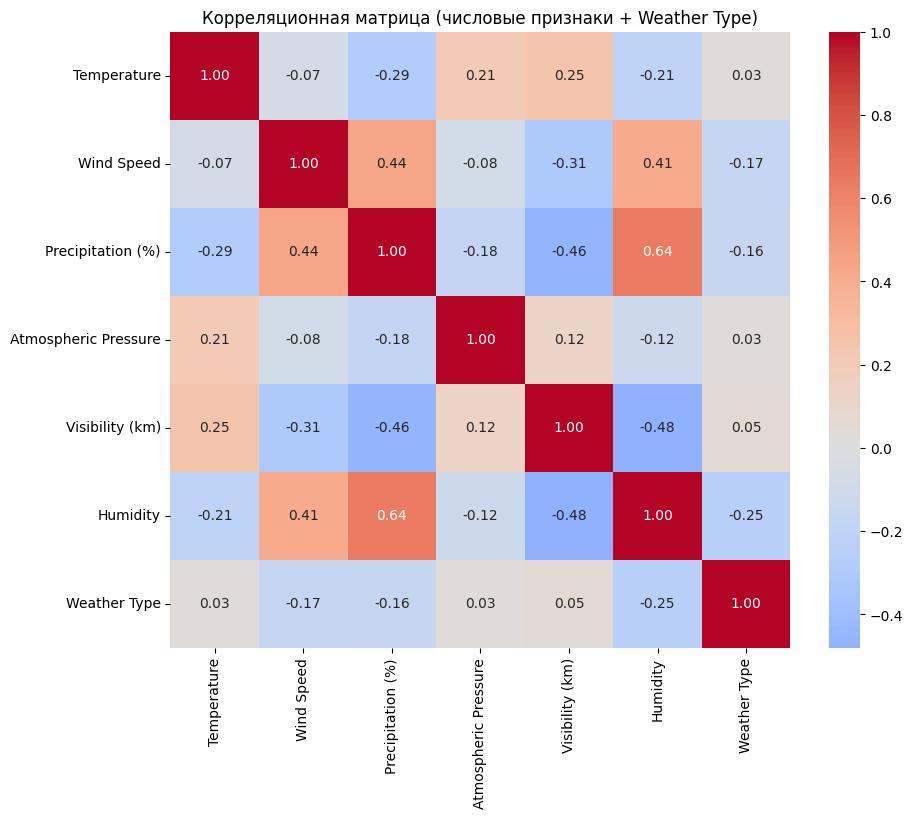

Корреляция признаков с Weather Type:
Weather Type            1.000000
Visibility (km)         0.047448
Atmospheric Pressure    0.030679
Temperature             0.028923
Precipitation (%)      -0.161578
Wind Speed             -0.166485
Humidity               -0.250558
Name: Weather Type, dtype: float64


In [ ]:
cols_for_corr = numeric_cols + ['Weather Type']
corr_matrix = df_encoded[cols_for_corr].corr()

plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    annot=True, fmt=".2f",
    cmap='coolwarm', center=0,
    cbar=True
)
plt.title("Корреляционная матрица (числовые признаки + Weather Type)")
plt.show()

# Корреляции с целевой переменной
print("Корреляция признаков с Weather Type:")
print(corr_matrix['Weather Type'].sort_values(ascending=False))


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# ANOVA F-test
selector_f = SelectKBest(score_func=f_classif, k='all')
selector_f.fit(X[numeric_cols], y)
scores_f = selector_f.scores_

# Mutual Information
selector_mi = SelectKBest(score_func=mutual_info_classif, k='all')
selector_mi.fit(X[numeric_cols], y)
scores_mi = selector_mi.scores_

# Собираем в таблицу для сравнения
scores_df = pd.DataFrame({
    'Feature': numeric_cols,
    'F_classif': scores_f,
    'Mutual_info': scores_mi
}).sort_values(by='F_classif', ascending=False)

print("Сравнение информативности числовых признаков:")
print(scores_df)


Сравнение информативности числовых признаков:
                Feature    F_classif  Mutual_info
0           Temperature  4797.673503     0.526742
2     Precipitation (%)  3776.770221     0.538238
4       Visibility (km)  1927.720840     0.444319
5              Humidity  1911.351373     0.275508
1            Wind Speed   877.147222     0.144423
3  Atmospheric Pressure   330.396542     0.648882


In [ ]:
from sklearn.feature_selection import chi2

cat_cols = df_encoded.select_dtypes(include=('int64')).columns.drop(['Weather Type'])

# Categorical
selector_cat = SelectKBest(score_func=chi2, k='all')
selector_cat.fit(X[cat_cols], y)
scores_cat = selector_cat.scores_

# Результаты
cat_scores = pd.DataFrame({
    'Feature': cat_cols,
    'Chi2': scores_cat
}).sort_values(by='Chi2', ascending=False)


print("ТОП категориальных признаков по chi²:")
print(cat_scores.head(10))


ТОП категориальных признаков по chi²:
       Feature          Chi2
1     UV Index  16954.109237
2       Season   2475.528101
0  Cloud Cover   2471.003730
3     Location    515.406453


In [ ]:
# Таблица числовых признаков (берём F_classif)
scores_num_df = pd.DataFrame({
    'Feature': numeric_cols,
    'Score': scores_f,
    'Method': 'f_classif'
})

# Cat
scores_cat_df = pd.DataFrame({
    'Feature': cat_cols,
    'Score': scores_cat,
    'Method': 'chi2'
})

# Объединяем
all_scores = pd.concat([scores_num_df, scores_cat_df], ignore_index=True)

# Сортируем по убыванию
top10 = all_scores.sort_values(by='Score', ascending=False).head(10)

print("ТОП-10 признаков по информативности (f_classif/chi²):")
print(top10)


ТОП-10 признаков по информативности (f_classif/chi²):
                Feature         Score     Method
7              UV Index  16954.109237       chi2
0           Temperature   4797.673503  f_classif
2     Precipitation (%)   3776.770221  f_classif
8                Season   2475.528101       chi2
6           Cloud Cover   2471.003730       chi2
4       Visibility (km)   1927.720840  f_classif
5              Humidity   1911.351373  f_classif
1            Wind Speed    877.147222  f_classif
9              Location    515.406453       chi2
3  Atmospheric Pressure    330.396542  f_classif


In [ ]:
from sklearn.model_selection import train_test_split

def get_top10_features(random_state):
    # Делим данные
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.3,
                                                        random_state=random_state)

    # Числовые по f_classif
    sel_num = SelectKBest(score_func=f_classif, k='all')
    sel_num.fit(X_train[numeric_cols], y_train)
    scores_num = sel_num.scores_
    df_num = pd.DataFrame({'Feature': numeric_cols, 'Score': scores_num, 'Method': 'f_classif'})

    # Cat
    sel_cat = SelectKBest(score_func=chi2, k='all')
    sel_cat.fit(X_train[cat_cols], y_train)
    scores_cat = sel_cat.scores_
    df_cat = pd.DataFrame({'Feature': cat_cols, 'Score': scores_cat, 'Method': 'chi2'})

    # Объединяем
    df_all = pd.concat([df_num, df_cat], ignore_index=True)
    return df_all.sort_values(by='Score', ascending=False).head(10)['Feature'].tolist()

# Проверим для нескольких случайных состояний
for rs in [1984, 69, 228, 200]:
    top10 = get_top10_features(random_state=rs)
    print(f"random_state={rs} → {top10}")


random_state=1984 → ['UV Index', 'Temperature', 'Precipitation (%)', 'Cloud Cover', 'Season', 'Visibility (km)', 'Humidity', 'Wind Speed', 'Location', 'Atmospheric Pressure']
random_state=69 → ['UV Index', 'Temperature', 'Precipitation (%)', 'Cloud Cover', 'Season', 'Visibility (km)', 'Humidity', 'Wind Speed', 'Location', 'Atmospheric Pressure']
random_state=228 → ['UV Index', 'Temperature', 'Precipitation (%)', 'Season', 'Cloud Cover', 'Visibility (km)', 'Humidity', 'Wind Speed', 'Location', 'Atmospheric Pressure']
random_state=200 → ['UV Index', 'Temperature', 'Precipitation (%)', 'Cloud Cover', 'Season', 'Humidity', 'Visibility (km)', 'Wind Speed', 'Location', 'Atmospheric Pressure']


In [ ]:
all_scores = pd.DataFrame({
    'Feature': numeric_cols + cat_cols.tolist(),
    'Score': list(scores_f) + list(scores_cat)
})

# Сортируем по убыванию
all_scores = all_scores.sort_values(by='Score', ascending=False).reset_index(drop=True)

for K in [3, 5, 8, 10]:
    top_features = all_scores.head(K)['Feature'].tolist()
    print(f"\nТОП-{K} признаков:")
    print(top_features)



ТОП-3 признаков:
['UV Index', 'Temperature', 'Precipitation (%)']

ТОП-5 признаков:
['UV Index', 'Temperature', 'Precipitation (%)', 'Season', 'Cloud Cover']

ТОП-8 признаков:
['UV Index', 'Temperature', 'Precipitation (%)', 'Season', 'Cloud Cover', 'Visibility (km)', 'Humidity', 'Wind Speed']

ТОП-10 признаков:
['UV Index', 'Temperature', 'Precipitation (%)', 'Season', 'Cloud Cover', 'Visibility (km)', 'Humidity', 'Wind Speed', 'Location', 'Atmospheric Pressure']


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import numpy as np

# Разделение
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1251, stratify=y)

# Топ-3 признаков из SelectKBest
top3_features = ['UV Index', 'Temperature', 'Precipitation (%)']

X_train_top3 = X_train[top3_features]
X_test_top3 = X_test[top3_features]

# Обучение моделей на топ-3 признаках
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=1251),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=1251),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=1251)
}

results_top3 = {}

for name, model in models.items():
    model.fit(X_train_top3, y_train)
    y_pred = model.predict(X_test_top3)
    y_proba = model.predict_proba(X_test_top3)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Для многоклассового AUC используем ovr
    lb = LabelBinarizer()
    y_test_bin = lb.fit_transform(y_test)
    auc = roc_auc_score(y_test_bin, y_proba, multi_class='ovr', average='weighted')

    results_top3[name] = {'Accuracy': acc, 'F1': f1, 'AUC': auc}
    print(f"{name} (Top-3): Accuracy={acc:.4f}, F1={f1:.4f}, AUC={auc:.4f}")



LogisticRegression (Top-3): Accuracy=0.8314, F1=0.8313, AUC=0.9181
RandomForest (Top-3): Accuracy=0.8534, F1=0.8534, AUC=0.9717
GradientBoosting (Top-3): Accuracy=0.8625, F1=0.8627, AUC=0.9780


In [ ]:
# Топ-10 признаков из SelectKBest
top10_features = ['UV Index', 'Temperature', 'Precipitation (%)', 'Season', 'Cloud Cover', 'Visibility (km)', 'Humidity', 'Wind Speed', 'Location', 'Atmospheric Pressure']

X_train_top10 = X_train[top10_features]
X_test_top10 = X_test[top10_features]

results_top10 = {}

for name, model in models.items():
    model.fit(X_train_top10, y_train)
    y_pred = model.predict(X_test_top10)
    y_proba = model.predict_proba(X_test_top10)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Для многоклассового AUC используем ovr
    lb = LabelBinarizer()
    y_test_bin = lb.fit_transform(y_test)
    auc = roc_auc_score(y_test_bin, y_proba, multi_class='ovr', average='weighted')

    results_top10[name] = {'Accuracy': acc, 'F1': f1, 'AUC': auc}
    print(f"{name} (Top-10): Accuracy={acc:.4f}, F1={f1:.4f}, AUC={auc:.4f}")


LogisticRegression (Top-10): Accuracy=0.8496, F1=0.8492, AUC=0.9439
RandomForest (Top-10): Accuracy=0.9121, F1=0.9122, AUC=0.9936
GradientBoosting (Top-10): Accuracy=0.9114, F1=0.9114, AUC=0.9927


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier(n_estimators=100, random_state=1251)
selector_rfe = RFE(estimator, n_features_to_select=5)
selector_rfe.fit(X_train, y_train)

rfe_selected = X_train.columns[selector_rfe.support_].tolist()
print("RFE (Top-5):", rfe_selected)


RFE (Top-5): ['Temperature', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# L1-регуляризация
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, random_state=42, max_iter=1000)
lr_l1.fit(X_train, y_train)

# Отбор признаков с ненулевыми коэффициентами
selector_l1 = SelectFromModel(lr_l1, prefit=True)
l1_selected = X_train.columns[selector_l1.get_support()].tolist()

print("L1-регуляризация (ненулевые веса):")
print(l1_selected)

coef_abs = np.abs(lr_l1.coef_).mean(axis=0)
top5_l1_idx = np.argsort(coef_abs)[-5:][::-1]
top5_l1 = X_train.columns[top5_l1_idx].tolist()
print("\nТоп-5 по модулю коэффициентов (L1):")
print(top5_l1)


L1-регуляризация (ненулевые веса):
['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season', 'Visibility (km)', 'Location']

Топ-5 по модулю коэффициентов (L1):
['Temperature', 'Precipitation (%)', 'Cloud Cover', 'Season', 'Visibility (km)']


In [ ]:
rf_full = RandomForestClassifier(n_estimators=100, random_state=42)
rf_full.fit(X_train, y_train)

importances = rf_full.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

top5_rf = feature_importances.head(5)['Feature'].tolist()
print("Топ-5 по feature_importances (RandomForest):")
print(top5_rf)


Топ-5 по feature_importances (RandomForest):
['Temperature', 'Visibility (km)', 'Precipitation (%)', 'UV Index', 'Atmospheric Pressure']


In [ ]:
# Подготовка
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    df_encoded.drop('Weather Type', axis=1),
    df_encoded['Weather Type'],
    test_size=0.2,
    random_state=1251,
    stratify=df_encoded['Weather Type']
)

# Наборы признаков
feature_sets = {
    'SelectKBest': ['UV Index', 'Temperature', 'Precipitation (%)', 'Season', 'Cloud Cover'],
    'RFE': ['Temperature', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
    'L1_top5': ['Temperature', 'Precipitation (%)', 'Cloud Cover', 'Season', 'Visibility (km)'],
    'RF_importances': ['Temperature', 'Visibility (km)', 'Precipitation (%)', 'UV Index', 'Atmospheric Pressure']
}

# Модели
models_to_test = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Оценка
results_comparison = {}

for model_name, model in models_to_test.items():
    results_comparison[model_name] = {}
    for method, features in feature_sets.items():
        X_train_sub = X_train_full[features]
        X_test_sub = X_test_full[features]

        model.fit(X_train_sub, y_train_full)
        y_pred = model.predict(X_test_sub)
        y_proba = model.predict_proba(X_test_sub)

        acc = accuracy_score(y_test_full, y_pred)
        f1 = f1_score(y_test_full, y_pred, average='weighted')
        lb = LabelBinarizer()
        y_test_bin = lb.fit_transform(y_test_full)
        auc = roc_auc_score(y_test_bin, y_proba, multi_class='ovr', average='weighted')

        results_comparison[model_name][method] = {'Accuracy': acc, 'F1': f1, 'AUC': auc}
        print(f"{model_name} | {method}: Acc={acc:.4f}, F1={f1:.4f}, AUC={auc:.4f}")


LogisticRegression | SelectKBest: Acc=0.8212, F1=0.8207, AUC=0.9361
LogisticRegression | RFE: Acc=0.8572, F1=0.8569, AUC=0.9269
LogisticRegression | L1_top5: Acc=0.7962, F1=0.7947, AUC=0.9269
LogisticRegression | RF_importances: Acc=0.8572, F1=0.8569, AUC=0.9269
RandomForest | SelectKBest: Acc=0.8875, F1=0.8878, AUC=0.9831
RandomForest | RFE: Acc=0.8966, F1=0.8966, AUC=0.9898
RandomForest | L1_top5: Acc=0.8894, F1=0.8897, AUC=0.9849
RandomForest | RF_importances: Acc=0.8962, F1=0.8961, AUC=0.9894
GradientBoosting | SelectKBest: Acc=0.8939, F1=0.8945, AUC=0.9859
GradientBoosting | RFE: Acc=0.8973, F1=0.8974, AUC=0.9894
GradientBoosting | L1_top5: Acc=0.8913, F1=0.8919, AUC=0.9853
GradientBoosting | RF_importances: Acc=0.8973, F1=0.8974, AUC=0.9894


In [ ]:
selectkbest_features = all_scores.sort_values(by='Score', ascending=False)['Feature'].tolist()

rf_full_for_rfe = RandomForestClassifier(n_estimators=100, random_state=1251)
rf_full_for_rfe.fit(X_train_full, y_train_full)
rfe_like_rank = pd.DataFrame({
    'Feature': X_train_full.columns,
    'Importance': rf_full_for_rfe.feature_importances_
}).sort_values(by='Importance', ascending=False)['Feature'].tolist()

coef_abs = np.abs(lr_l1.coef_).mean(axis=0)
l1_rank_idx = np.argsort(coef_abs)[::-1]
l1_rank = X_train_full.columns[l1_rank_idx].tolist()

rf_importances_rank = feature_importances['Feature'].tolist()

# Словарь рангов
ranks = {
    'SelectKBest': selectkbest_features,
    'RFE_like': rfe_like_rank,
    'L1': l1_rank,
    'RF_importances': rf_importances_rank
}


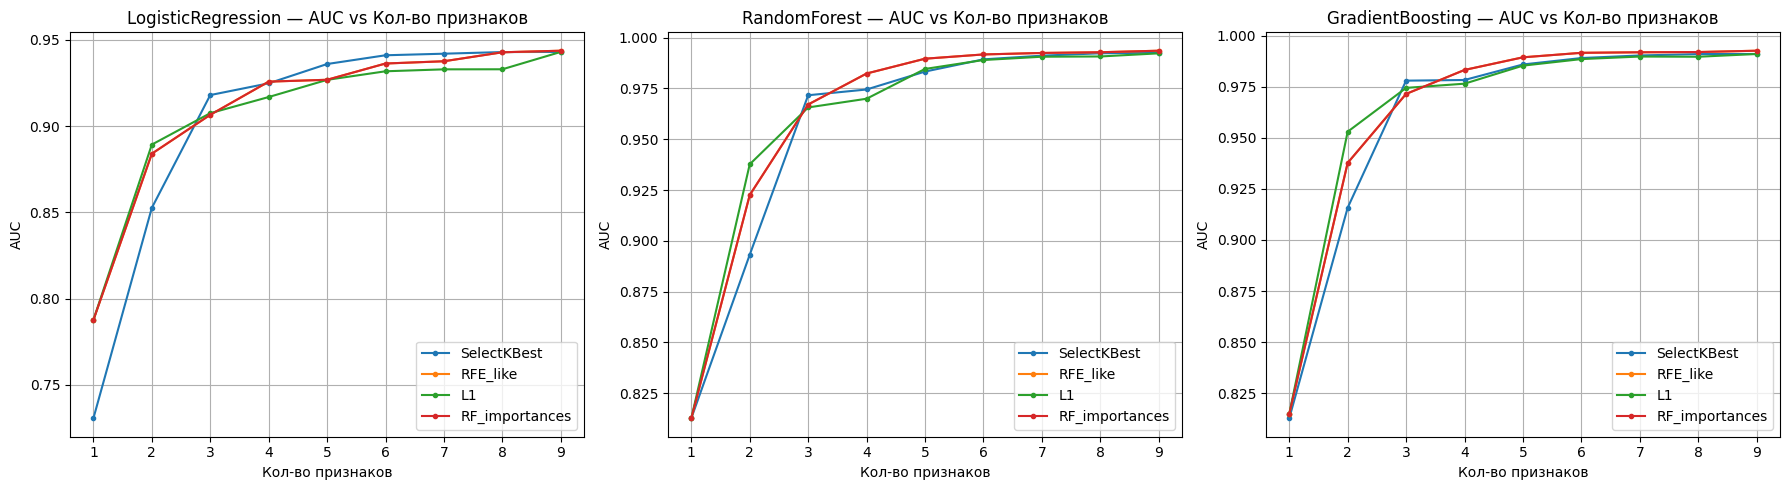

In [ ]:
import matplotlib.pyplot as plt

# Модели
models_auc_plot = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=1251),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=1251),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=1251)
}

n_features_range = range(1, 10)

# Построение графиков
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax_idx, (model_name, model) in enumerate(models_auc_plot.items()):
    ax = axes[ax_idx]
    for method, feature_list in ranks.items():
        auc_scores = []
        for n in n_features_range:
            top_n_features = feature_list[:n]
            X_train_n = X_train_full[top_n_features]
            X_test_n = X_test_full[top_n_features]

            model.fit(X_train_n, y_train_full)
            y_proba = model.predict_proba(X_test_n)

            lb = LabelBinarizer()
            y_test_bin = lb.fit_transform(y_test_full)
            auc = roc_auc_score(y_test_bin, y_proba, multi_class='ovr', average='weighted')
            auc_scores.append(auc)

        ax.plot(n_features_range, auc_scores, label=method, marker='o', markersize=3)

    ax.set_title(f'{model_name} — AUC vs Кол-во признаков')
    ax.set_xlabel('Кол-во признаков')
    ax.set_ylabel('AUC')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


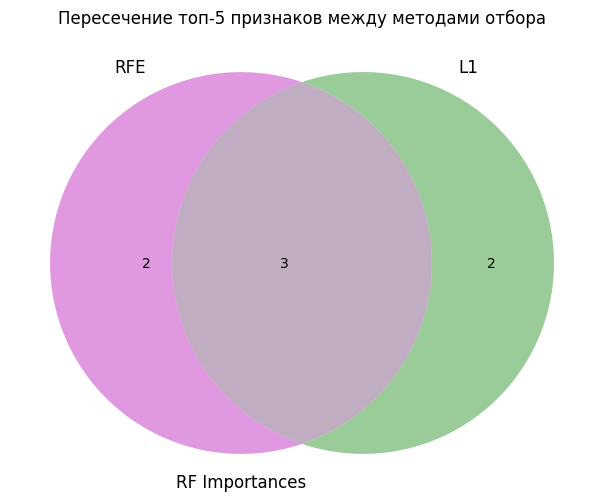

Общие признаки между всеми тремя методами:
{'Precipitation (%)', 'Temperature', 'Visibility (km)'}

RFE ∩ RF Importances (без L1):
{'Atmospheric Pressure', 'UV Index'}

RFE ∩ L1 (без RF):
set()

L1 ∩ RF (без RFE):
set()


In [ ]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Определяем множества признаков
rfe_set = set(['Temperature', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)'])

l1_set = set(['Temperature', 'Precipitation (%)', 'Cloud Cover', 'Season', 'Visibility (km)'])

rf_imp_set = set(['Temperature', 'Visibility (km)', 'Precipitation (%)', 'UV Index', 'Atmospheric Pressure'])

# Строим диаграмму Венна
plt.figure(figsize=(8, 6))
venn3([rfe_set, l1_set, rf_imp_set],
      set_labels=('RFE', 'L1', 'RF Importances'))

plt.title('Пересечение топ-5 признаков между методами отбора')
plt.show()

# Выведем пересечения явно
print("Общие признаки между всеми тремя методами:")
print(rfe_set & l1_set & rf_imp_set)

print("\nRFE ∩ RF Importances (без L1):")
print((rfe_set & rf_imp_set) - l1_set)

print("\nRFE ∩ L1 (без RF):")
print((rfe_set & l1_set) - rf_imp_set)

print("\nL1 ∩ RF (без RFE):")
print((l1_set & rf_imp_set) - rfe_set)


In [ ]:
X = df_encoded.drop('Weather Type', axis=1)
y = df_encoded['Weather Type']

np.random.seed(42)
for i in range(1, 6):
    X[f'Noise_{i}'] = np.random.randn(len(X))

print(f"Размер датасета после добавления шума: {X.shape}")
print("Добавлены шумовые признаки: ", [f'Noise_{i}' for i in range(1,6)])


Размер датасета после добавления шума: (13200, 15)
Добавлены шумовые признаки:  ['Noise_1', 'Noise_2', 'Noise_3', 'Noise_4', 'Noise_5']


In [ ]:
print("Пропуски в данных:", X.isnull().sum().sum())
print("\nТипы признаков:")
print(X.dtypes.value_counts())

print("\nРаспределение целевой переменной:")
print(y.value_counts().sort_index())

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("\nКодированные классы:", dict(zip(le.classes_, le.transform(le.classes_))))


Пропуски в данных: 0

Типы признаков:
float64    11
int64       4
Name: count, dtype: int64

Распределение целевой переменной:
Weather Type
0    3300
1    3300
2    3300
3    3300
Name: count, dtype: int64

Кодированные классы: {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3)}


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import time
import xgboost as xgb
from xgboost import XGBClassifier
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=7,
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1
)
param_grid = {
    'max_depth': [4, 6],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1251)
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
print("Запуск подбора гиперпараметров...")
start_time = time.time()
grid_search.fit(X, y_encoded)
end_time = time.time()
print(f"\nЛучшие параметры: {grid_search.best_params_}")
print(f"Лучшая точность (CV): {grid_search.best_score_:.4f}")
print(f"Время подбора: {end_time - start_time:.2f} секунд")
best_xgb = grid_search.best_estimator_


Запуск подбора гиперпараметров...
Fitting 3 folds for each of 32 candidates, totalling 96 fits

Лучшие параметры: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
Лучшая точность (CV): 0.9176
Время подбора: 132.29 секунд


In [ ]:
from sklearn.inspection import permutation_importance

# Вычисляем Permutation Importance
perm_importance = permutation_importance(
    best_xgb, X, y_encoded,
    n_repeats=5,
    random_state=1251,
    n_jobs=-1
)

perm_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean,
    'Std': perm_importance.importances_std
}).sort_values(by='Importance', ascending=False)

print("Топ-10 признаков по Permutation Importance:")
print(perm_df.head(10))


Топ-10 признаков по Permutation Importance:
                 Feature  Importance       Std
0            Temperature    0.185273  0.003189
4            Cloud Cover    0.102864  0.000763
3      Precipitation (%)    0.082045  0.001875
8        Visibility (km)    0.075061  0.001269
5   Atmospheric Pressure    0.050136  0.001257
6               UV Index    0.047803  0.000767
2             Wind Speed    0.013409  0.000812
7                 Season    0.010924  0.000487
1               Humidity    0.007576  0.000407
12               Noise_3    0.002955  0.000303


/tmp/ipython-input-3630334932.py:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X, plot_type="bar", max_display=20, show=False)


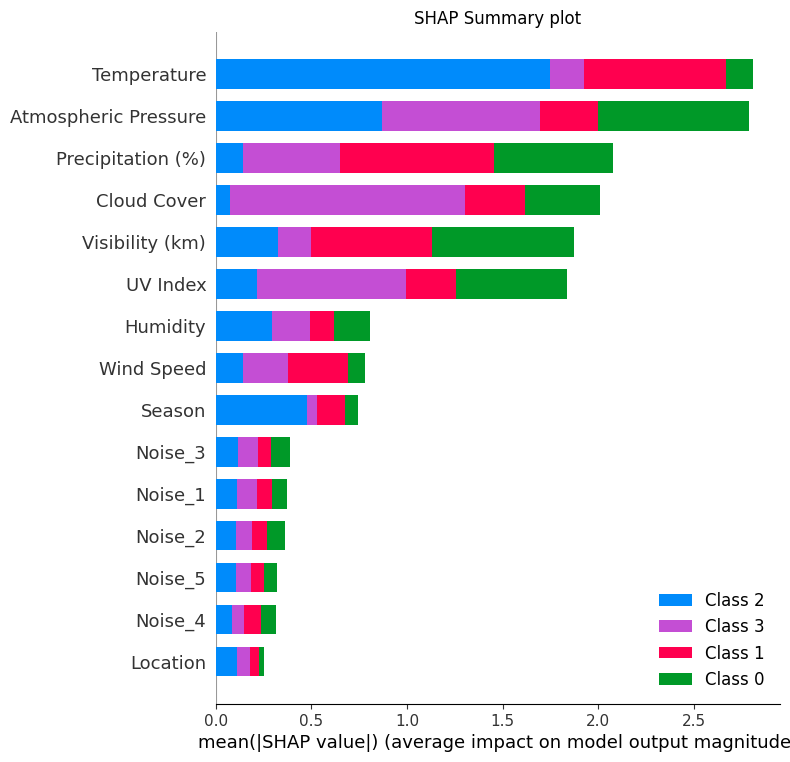

/tmp/ipython-input-3630334932.py:7: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X, max_display=20, show=False)


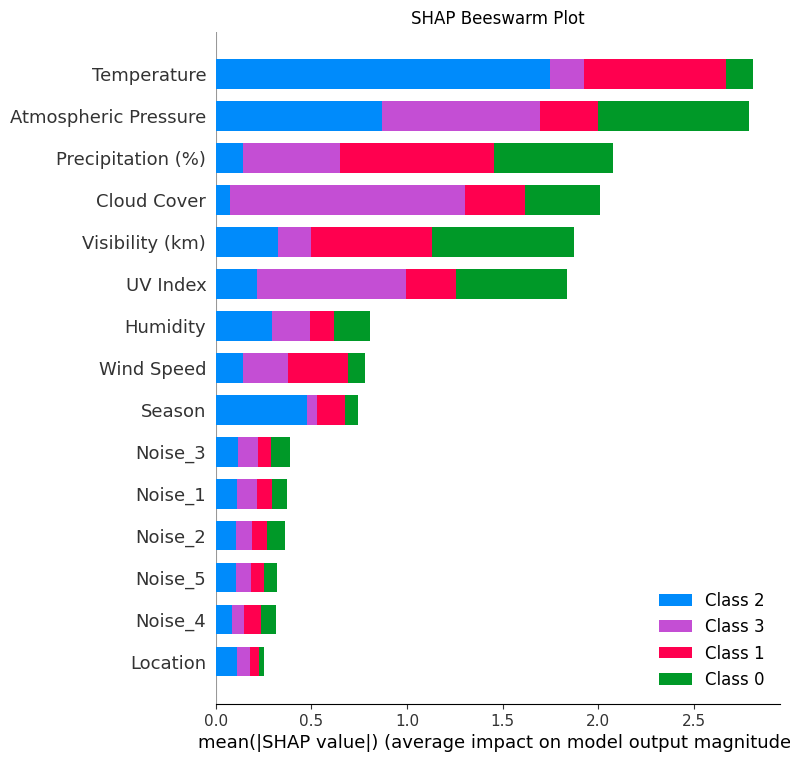

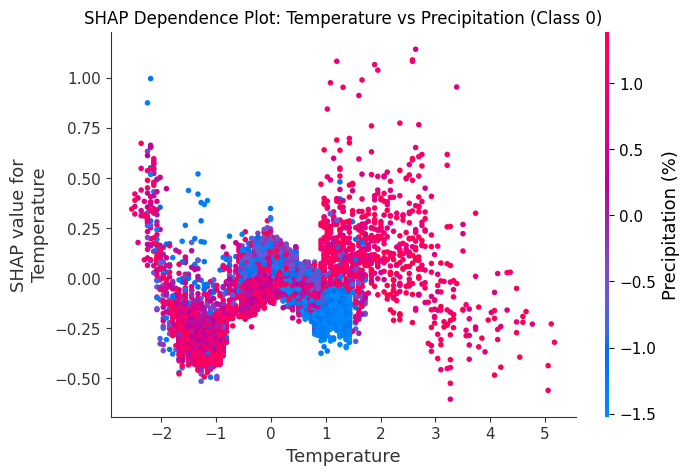

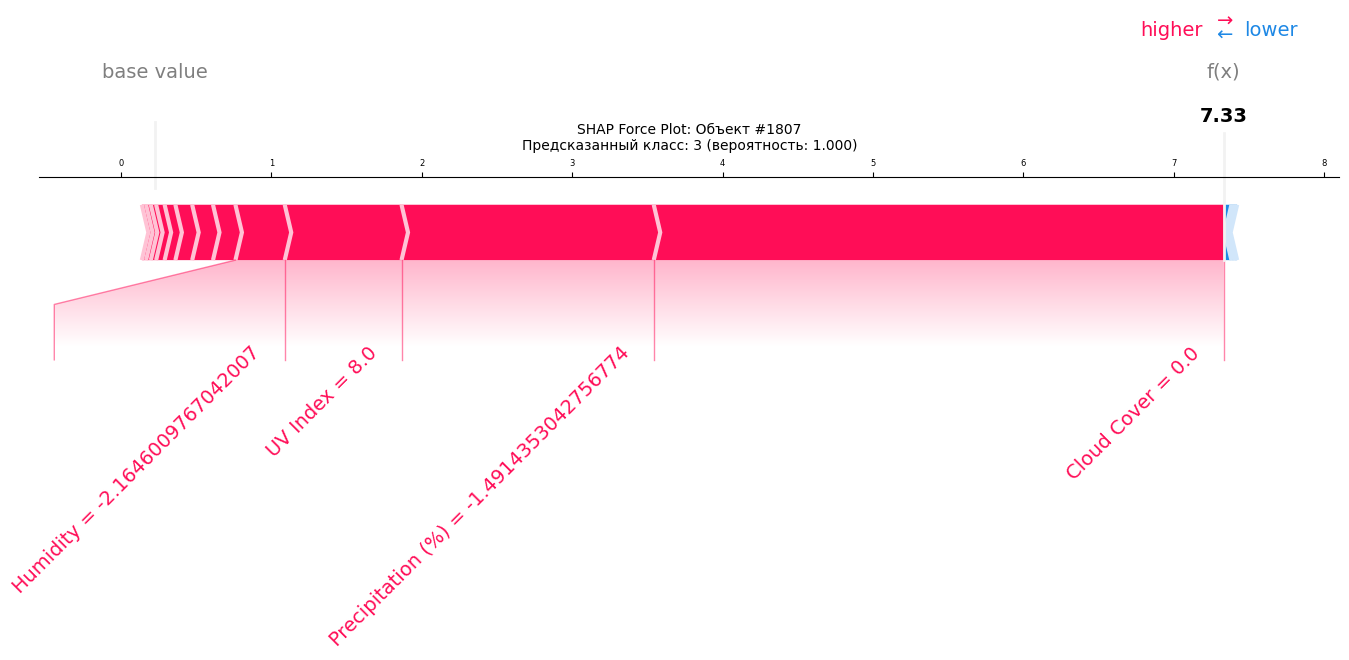

In [ ]:
import shap
explainer = shap.Explainer(best_xgb)
shap_values = explainer(X)
shap.summary_plot(shap_values, X, plot_type="bar", max_display=20, show=False)
plt.title("SHAP Summary plot")
plt.show()
shap.summary_plot(shap_values, X, max_display=20, show=False)
plt.title("SHAP Beeswarm Plot")
plt.show()
class_idx = 0  # Cover_Type=1
shap_values_class = shap_values.values[:, :, class_idx]
shap.dependence_plot(
    "Temperature",
    shap_values_class,
    X,
    interaction_index="Precipitation (%)",
    show=False
)
plt.title(f"SHAP Dependence Plot: Temperature vs Precipitation (Class {le.classes_[class_idx]})")
plt.show()
# Выбираем объект с максимальной предсказанной вероятностью
y_pred_proba = best_xgb.predict_proba(X)
max_prob_idx = np.argmax(y_pred_proba.max(axis=1))
# Получаем SHAP-значения для всего датасета
explainer = shap.Explainer(best_xgb)
shap_values = explainer(X)
predicted_class = np.argmax(y_pred_proba[max_prob_idx])
shap.force_plot(
    explainer.expected_value[predicted_class],
    shap_values.values[max_prob_idx, :, predicted_class],
    X.iloc[max_prob_idx],
    feature_names=X.columns,
    matplotlib=True,
    show=False,
    text_rotation=45,
    figsize=(20, 6)
)
plt.gca().tick_params(axis='both', which='major', labelsize=6)
for text in plt.gca().texts:
    text.set_fontsize(14)
plt.title(f"SHAP Force Plot: Объект #{max_prob_idx}\nПредсказанный класс: {le.classes_[predicted_class]} (вероятность: {y_pred_proba[max_prob_idx][predicted_class]:.3f})", fontsize=10)
plt.subplots_adjust(left=0.3, right=0.95, top=0.8, bottom=0.2)
plt.show()


In [ ]:
shap_abs_means = np.abs(shap_values.values).mean(axis=(0, 2))

shap_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'SHAP_MeanAbs': shap_abs_means
}).sort_values('SHAP_MeanAbs', ascending=True)

top_features_to_keep = shap_importance_df.iloc[5:]['Feature'].tolist()
X_reduced = X[top_features_to_keep]

print(f"Удалено 5 наименее важных признаков: {shap_importance_df.head(5)['Feature'].tolist()}")
print(f"Осталось признаков: {X_reduced.shape[1]}")


Удалено 5 наименее важных признаков: ['Location', 'Noise_4', 'Noise_5', 'Noise_2', 'Noise_1']
Осталось признаков: 10


In [ ]:
xgb_reduced = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=7,
    eval_metric='mlogloss',
    random_state=1251,
    n_jobs=-1,
    **grid_search.best_params_
)
start_time = time.time()
xgb_reduced.fit(X_reduced, y_encoded)
end_time = time.time()
y_pred_reduced = xgb_reduced.predict(X_reduced)
acc_reduced = accuracy_score(y_encoded, y_pred_reduced)
f1_reduced = f1_score(y_encoded, y_pred_reduced, average='weighted')
y_pred_full = best_xgb.predict(X)
acc_full = accuracy_score(y_encoded, y_pred_full)
f1_full = f1_score(y_encoded, y_pred_full, average='weighted')
print(f"=== Сравнение моделей ===")
print(f"Полная модель (15 признаков): Accuracy={acc_full:.4f}, F1={f1_full:.4f}, Time={end_time - start_time:.2f}с")
print(f"Сокращённая модель (10 признаков): Accuracy={acc_reduced:.4f}, F1={f1_reduced:.4f}, Time={end_time - start_time:.2f}с")


=== Сравнение моделей ===
Полная модель (15 признаков): Accuracy=0.9998, F1=0.9998, Time=1.77с
Сокращённая модель (10 признаков): Accuracy=0.9993, F1=0.9993, Time=1.77с


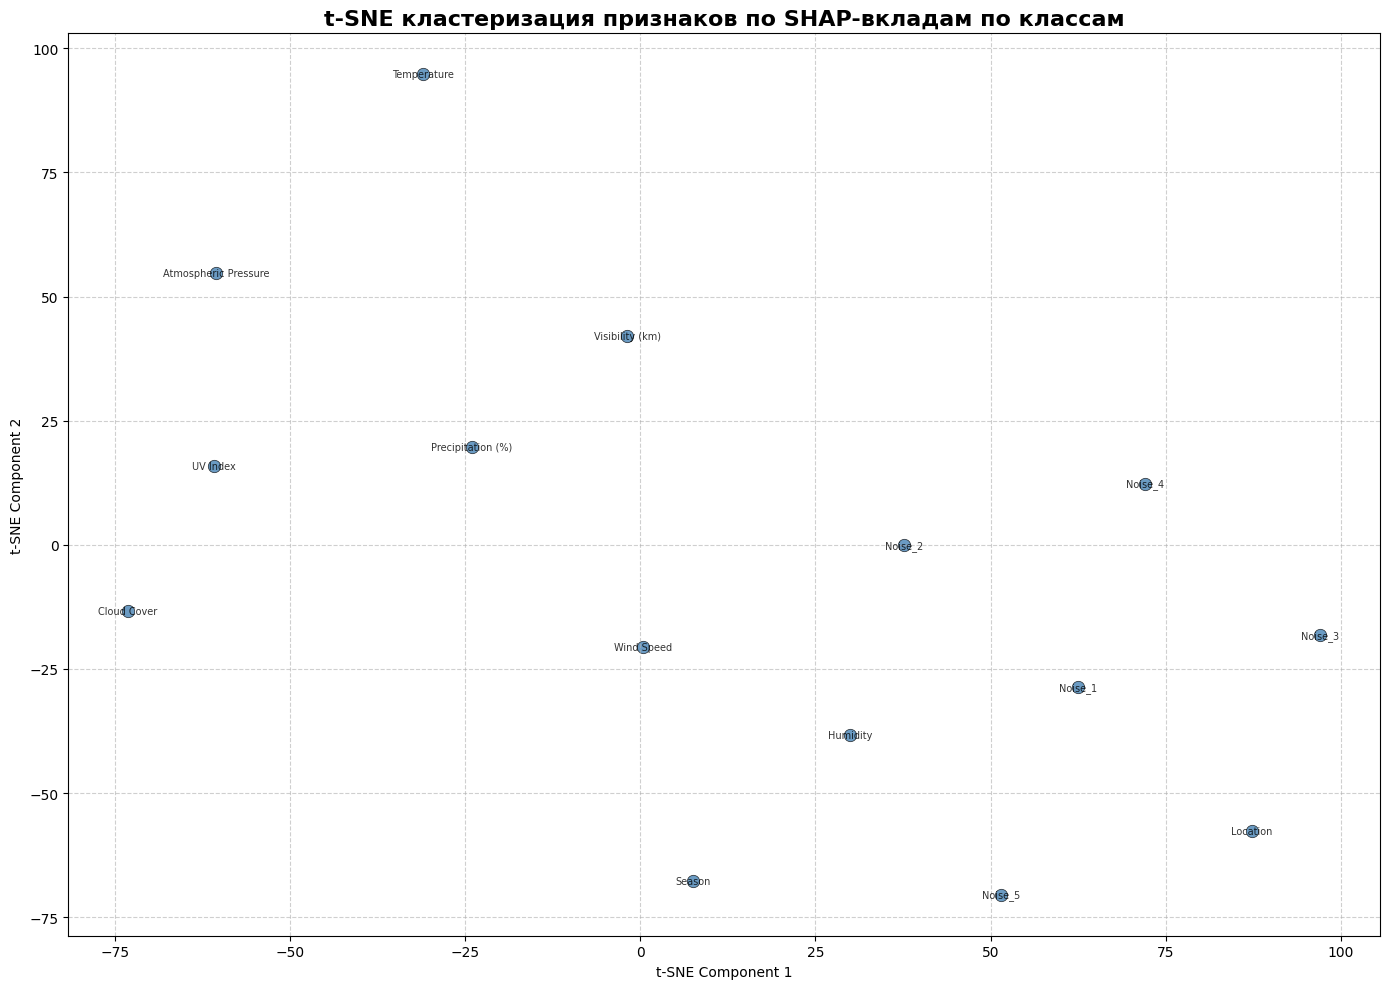

In [ ]:
from sklearn.manifold import TSNE
shap_by_class = np.abs(shap_values.values).mean(axis=0)
tsne = TSNE(n_components=2, perplexity=10, max_iter=1000, random_state=1251, learning_rate='auto')
shap_tsne = tsne.fit_transform(shap_by_class)
plt.figure(figsize=(14, 10))
scatter = plt.scatter(shap_tsne[:, 0], shap_tsne[:, 1], s=80, alpha=0.8, c='steelblue', edgecolor='black', linewidth=0.5)
for i, feature in enumerate(X.columns):
    plt.annotate(feature, (shap_tsne[i, 0], shap_tsne[i, 1]), fontsize=7, alpha=0.8, ha='center', va='center')
plt.title("t-SNE кластеризация признаков по SHAP-вкладам по классам", fontsize=16, fontweight='bold')
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
